In [1]:
import os
from __future__ import print_function
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim

import torchvision.datasets as datasets
import torchvision.transforms as transforms
import torchvision.models as models

import matplotlib.pyplot as plt

In [2]:
root = "D:/Training/itHillel/Machine Learning/Lesson_14/tiny-imagenet-200/tiny-imagenet-200/"
num_classes = 200
batch_size = 64

In [3]:
def load_data(directory):
    transform_mean = np.array([0.485, 0.456, 0.406])
    transform_std = np.array([0.229, 0.224, 0.225])

    train_transform = transforms.Compose(
        [
            transforms.RandomCrop(64),
            transforms.RandomRotation(degrees=66),
            transforms.ColorJitter(brightness=0.5, contrast=1, saturation=0.1, hue=0.5),
            transforms.ToTensor(),
            transforms.Normalize(mean=transform_mean, std=transform_std),
        ]
    )

    val_transform = transforms.Compose(
        [
            transforms.RandomCrop(64),
            transforms.RandomRotation(degrees=66),
            transforms.ColorJitter(brightness=0.5, contrast=1, saturation=0.1, hue=0.5),
            transforms.ToTensor(),
            transforms.Normalize(mean=transform_mean, std=transform_std),
        ]
    )

    traindir = os.path.join(root, "train")
    valdir = os.path.join(root, "val")

    train = datasets.ImageFolder(traindir, train_transform)
    val = datasets.ImageFolder(valdir, val_transform)

    train_loader = torch.utils.data.DataLoader(train, batch_size=batch_size, num_workers=4, shuffle=True)
    val_loader = torch.utils.data.DataLoader(val, batch_size=batch_size, num_workers=4, shuffle=True)

    assert num_classes == len(train_loader.dataset.classes)

    return train_loader, val_loader, traindir, valdir


train_loader, val_loader, traindir, valdir = load_data(root)

In [4]:
train_loader

In [5]:
with open(os.path.join(root, "words.txt"), "r") as dictionary_file:
    
    line = dictionary_file.readlines()
    line

In [6]:
line[0]

'n00001740\tentity\n'

In [7]:
new_line = []
for i in line:
    new_line.append(i[:-1].split("\t"))

new_line

[['n00001740', 'entity'],
 ['n00001930', 'physical entity'],
 ['n00002137', 'abstraction, abstract entity'],
 ['n00002452', 'thing'],
 ['n00002684', 'object, physical object'],
 ['n00003553', 'whole, unit'],
 ['n00003993', 'congener'],
 ['n00004258', 'living thing, animate thing'],
 ['n00004475', 'organism, being'],
 ['n00005787', 'benthos'],
 ['n00005930', 'dwarf'],
 ['n00006024', 'heterotroph'],
 ['n00006150', 'parent'],
 ['n00006269', 'life'],
 ['n00006400', 'biont'],
 ['n00006484', 'cell'],
 ['n00007347', 'causal agent, cause, causal agency'],
 ['n00007846', 'person, individual, someone, somebody, mortal, soul'],
 ['n00015388', 'animal, animate being, beast, brute, creature, fauna'],
 ['n00017222', 'plant, flora, plant life'],
 ['n00019046', 'native'],
 ['n00019128', 'natural object'],
 ['n00019613', 'substance'],
 ['n00020090', 'substance'],
 ['n00020827', 'matter'],
 ['n00021265', 'food, nutrient'],
 ['n00021734', 'nutrient'],
 ['n00021939', 'artifact, artefact'],
 ['n00022903', 

In [8]:
len(new_line)

82115

In [9]:
small_labels = {}

for k in new_line:
    small_labels[k[0]] = k[1]

small_labels

{'n00001740': 'entity',
 'n00001930': 'physical entity',
 'n00002137': 'abstraction, abstract entity',
 'n00002452': 'thing',
 'n00002684': 'object, physical object',
 'n00003553': 'whole, unit',
 'n00003993': 'congener',
 'n00004258': 'living thing, animate thing',
 'n00004475': 'organism, being',
 'n00005787': 'benthos',
 'n00005930': 'dwarf',
 'n00006024': 'heterotroph',
 'n00006150': 'parent',
 'n00006269': 'life',
 'n00006400': 'biont',
 'n00006484': 'cell',
 'n00007347': 'causal agent, cause, causal agency',
 'n00007846': 'person, individual, someone, somebody, mortal, soul',
 'n00015388': 'animal, animate being, beast, brute, creature, fauna',
 'n00017222': 'plant, flora, plant life',
 'n00019046': 'native',
 'n00019128': 'natural object',
 'n00019613': 'substance',
 'n00020090': 'substance',
 'n00020827': 'matter',
 'n00021265': 'food, nutrient',
 'n00021734': 'nutrient',
 'n00021939': 'artifact, artefact',
 'n00022903': 'article',
 'n00023100': 'psychological feature',
 'n0002

In [10]:
len(small_labels)

82115

In [11]:
os.listdir(traindir)[:5]

['n01443537', 'n01629819', 'n01641577', 'n01644900', 'n01698640']

In [12]:
train_func = load_data("train_transform")
labels = {}
label_ids = {}
for label_index, label_id in enumerate(train_loader.dataset.classes):
    label = small_labels[label_id]
    labels[label_index] = label
    label_ids[label_id] = label_index

In [13]:
labels

{0: 'goldfish, Carassius auratus',
 1: 'European fire salamander, Salamandra salamandra',
 2: 'bullfrog, Rana catesbeiana',
 3: 'tailed frog, bell toad, ribbed toad, tailed toad, Ascaphus trui',
 4: 'American alligator, Alligator mississipiensis',
 5: 'boa constrictor, Constrictor constrictor',
 6: 'trilobite',
 7: 'scorpion',
 8: 'black widow, Latrodectus mactans',
 9: 'tarantula',
 10: 'centipede',
 11: 'goose',
 12: 'koala, koala bear, kangaroo bear, native bear, Phascolarctos cinereus',
 13: 'jellyfish',
 14: 'brain coral',
 15: 'snail',
 16: 'slug',
 17: 'sea slug, nudibranch',
 18: 'American lobster, Northern lobster, Maine lobster, Homarus americanus',
 19: 'spiny lobster, langouste, rock lobster, crawfish, crayfish, sea crawfish',
 20: 'black stork, Ciconia nigra',
 21: 'king penguin, Aptenodytes patagonica',
 22: 'albatross, mollymawk',
 23: 'dugong, Dugong dugon',
 24: 'Chihuahua',
 25: 'Yorkshire terrier',
 26: 'golden retriever',
 27: 'Labrador retriever',
 28: 'German shep

In [14]:
label_ids

{'n01443537': 0,
 'n01629819': 1,
 'n01641577': 2,
 'n01644900': 3,
 'n01698640': 4,
 'n01742172': 5,
 'n01768244': 6,
 'n01770393': 7,
 'n01774384': 8,
 'n01774750': 9,
 'n01784675': 10,
 'n01855672': 11,
 'n01882714': 12,
 'n01910747': 13,
 'n01917289': 14,
 'n01944390': 15,
 'n01945685': 16,
 'n01950731': 17,
 'n01983481': 18,
 'n01984695': 19,
 'n02002724': 20,
 'n02056570': 21,
 'n02058221': 22,
 'n02074367': 23,
 'n02085620': 24,
 'n02094433': 25,
 'n02099601': 26,
 'n02099712': 27,
 'n02106662': 28,
 'n02113799': 29,
 'n02123045': 30,
 'n02123394': 31,
 'n02124075': 32,
 'n02125311': 33,
 'n02129165': 34,
 'n02132136': 35,
 'n02165456': 36,
 'n02190166': 37,
 'n02206856': 38,
 'n02226429': 39,
 'n02231487': 40,
 'n02233338': 41,
 'n02236044': 42,
 'n02268443': 43,
 'n02279972': 44,
 'n02281406': 45,
 'n02321529': 46,
 'n02364673': 47,
 'n02395406': 48,
 'n02403003': 49,
 'n02410509': 50,
 'n02415577': 51,
 'n02423022': 52,
 'n02437312': 53,
 'n02480495': 54,
 'n02481823': 55,
 '

In [15]:
with open(os.path.join(root, "val/val_annotations.txt"), "r") as val_label_file:
    line = val_label_file.readlines()
    line

In [16]:
line[2]

'val_2.JPEG\tn04070727\t4\t0\t60\t55\n'

In [17]:
new_lines = []
for i in line:
    new_lines.append(i.split("\t"))

new_lines

[['val_0.JPEG', 'n03444034', '0', '32', '44', '62\n'],
 ['val_1.JPEG', 'n04067472', '52', '55', '57', '59\n'],
 ['val_2.JPEG', 'n04070727', '4', '0', '60', '55\n'],
 ['val_3.JPEG', 'n02808440', '3', '3', '63', '63\n'],
 ['val_4.JPEG', 'n02808440', '9', '27', '63', '48\n'],
 ['val_5.JPEG', 'n04399382', '7', '0', '59', '63\n'],
 ['val_6.JPEG', 'n04179913', '0', '0', '63', '56\n'],
 ['val_7.JPEG', 'n02823428', '5', '0', '57', '63\n'],
 ['val_8.JPEG', 'n04146614', '0', '31', '60', '60\n'],
 ['val_9.JPEG', 'n02226429', '0', '3', '63', '57\n'],
 ['val_10.JPEG', 'n04371430', '37', '38', '44', '45\n'],
 ['val_11.JPEG', 'n07753592', '0', '1', '63', '47\n'],
 ['val_12.JPEG', 'n02226429', '5', '12', '57', '53\n'],
 ['val_13.JPEG', 'n03770439', '21', '33', '36', '43\n'],
 ['val_14.JPEG', 'n02056570', '0', '19', '63', '47\n'],
 ['val_15.JPEG', 'n02906734', '1', '0', '48', '22\n'],
 ['val_16.JPEG', 'n02125311', '7', '16', '60', '55\n'],
 ['val_17.JPEG', 'n04486054', '0', '9', '63', '63\n'],
 ['val_1

In [18]:
mylist = []
for i in new_lines:
    mylist.append(i[:2])

mylist

[['val_0.JPEG', 'n03444034'],
 ['val_1.JPEG', 'n04067472'],
 ['val_2.JPEG', 'n04070727'],
 ['val_3.JPEG', 'n02808440'],
 ['val_4.JPEG', 'n02808440'],
 ['val_5.JPEG', 'n04399382'],
 ['val_6.JPEG', 'n04179913'],
 ['val_7.JPEG', 'n02823428'],
 ['val_8.JPEG', 'n04146614'],
 ['val_9.JPEG', 'n02226429'],
 ['val_10.JPEG', 'n04371430'],
 ['val_11.JPEG', 'n07753592'],
 ['val_12.JPEG', 'n02226429'],
 ['val_13.JPEG', 'n03770439'],
 ['val_14.JPEG', 'n02056570'],
 ['val_15.JPEG', 'n02906734'],
 ['val_16.JPEG', 'n02125311'],
 ['val_17.JPEG', 'n04486054'],
 ['val_18.JPEG', 'n04285008'],
 ['val_19.JPEG', 'n03763968'],
 ['val_20.JPEG', 'n03814639'],
 ['val_21.JPEG', 'n03837869'],
 ['val_22.JPEG', 'n01983481'],
 ['val_23.JPEG', 'n01629819'],
 ['val_24.JPEG', 'n04532670'],
 ['val_25.JPEG', 'n04074963'],
 ['val_26.JPEG', 'n04540053'],
 ['val_27.JPEG', 'n04371430'],
 ['val_28.JPEG', 'n02906734'],
 ['val_29.JPEG', 'n02094433'],
 ['val_30.JPEG', 'n03796401'],
 ['val_31.JPEG', 'n07614500'],
 ['val_32.JPEG', '

In [19]:
len(mylist)

10000

In [20]:
val_label_map = {}

for k in mylist:
    val_label_map[k[0]] = k[1]

val_label_map

{'val_0.JPEG': 'n03444034',
 'val_1.JPEG': 'n04067472',
 'val_2.JPEG': 'n04070727',
 'val_3.JPEG': 'n02808440',
 'val_4.JPEG': 'n02808440',
 'val_5.JPEG': 'n04399382',
 'val_6.JPEG': 'n04179913',
 'val_7.JPEG': 'n02823428',
 'val_8.JPEG': 'n04146614',
 'val_9.JPEG': 'n02226429',
 'val_10.JPEG': 'n04371430',
 'val_11.JPEG': 'n07753592',
 'val_12.JPEG': 'n02226429',
 'val_13.JPEG': 'n03770439',
 'val_14.JPEG': 'n02056570',
 'val_15.JPEG': 'n02906734',
 'val_16.JPEG': 'n02125311',
 'val_17.JPEG': 'n04486054',
 'val_18.JPEG': 'n04285008',
 'val_19.JPEG': 'n03763968',
 'val_20.JPEG': 'n03814639',
 'val_21.JPEG': 'n03837869',
 'val_22.JPEG': 'n01983481',
 'val_23.JPEG': 'n01629819',
 'val_24.JPEG': 'n04532670',
 'val_25.JPEG': 'n04074963',
 'val_26.JPEG': 'n04540053',
 'val_27.JPEG': 'n04371430',
 'val_28.JPEG': 'n02906734',
 'val_29.JPEG': 'n02094433',
 'val_30.JPEG': 'n03796401',
 'val_31.JPEG': 'n07614500',
 'val_32.JPEG': 'n03837869',
 'val_33.JPEG': 'n03937543',
 'val_34.JPEG': 'n065963

In [21]:
len(val_label_map)

10000

In [22]:
val_loader.dataset.imgs[:5]

[('D:/Training/itHillel/Machine Learning/Lesson_14/tiny-imagenet-200/tiny-imagenet-200/val\\images\\val_0.JPEG',
  0),
 ('D:/Training/itHillel/Machine Learning/Lesson_14/tiny-imagenet-200/tiny-imagenet-200/val\\images\\val_1.JPEG',
  0),
 ('D:/Training/itHillel/Machine Learning/Lesson_14/tiny-imagenet-200/tiny-imagenet-200/val\\images\\val_10.JPEG',
  0),
 ('D:/Training/itHillel/Machine Learning/Lesson_14/tiny-imagenet-200/tiny-imagenet-200/val\\images\\val_100.JPEG',
  0),
 ('D:/Training/itHillel/Machine Learning/Lesson_14/tiny-imagenet-200/tiny-imagenet-200/val\\images\\val_1000.JPEG',
  0)]

In [23]:
for i in range(len(val_loader.dataset.imgs)):
    file_path = val_loader.dataset.imgs[i][0]
    
    file_name = os.path.basename(file_path)
    label_id = val_label_map[file_name]
    
    val_loader.dataset.imgs[i] = (file_path, label_ids[label_id])

In [24]:
val_loader.dataset.imgs[:5]

[('D:/Training/itHillel/Machine Learning/Lesson_14/tiny-imagenet-200/tiny-imagenet-200/val\\images\\val_0.JPEG',
  107),
 ('D:/Training/itHillel/Machine Learning/Lesson_14/tiny-imagenet-200/tiny-imagenet-200/val\\images\\val_1.JPEG',
  139),
 ('D:/Training/itHillel/Machine Learning/Lesson_14/tiny-imagenet-200/tiny-imagenet-200/val\\images\\val_10.JPEG',
  158),
 ('D:/Training/itHillel/Machine Learning/Lesson_14/tiny-imagenet-200/tiny-imagenet-200/val\\images\\val_100.JPEG',
  90),
 ('D:/Training/itHillel/Machine Learning/Lesson_14/tiny-imagenet-200/tiny-imagenet-200/val\\images\\val_1000.JPEG',
  138)]

In [25]:
def initialize_weights(m):
    weight_shape = list(m.weight.data.size())
    fan_in = weight_shape[1]
    fan_out = weight_shape[0]
    w_bound = np.sqrt(6. / (fan_in + fan_out))
    m.weight.data.uniform_(-w_bound, w_bound)
    m.bias.data.fill_(0)

In [26]:
pre_trained_model = models.alexnet(pretrained=True)
state_dict = pre_trained_model.state_dict()
state_dict.pop("classifier.6.weight")
state_dict.pop("classifier.6.bias")
model = models.alexnet(num_classes=num_classes)
model.load_state_dict(state_dict, strict=False)

parameters = model.classifier[6].parameters()
initialize_weights(model.classifier[6])

loss = nn.CrossEntropyLoss()
optimizer = optim.SGD(parameters, lr=0.001, momentum=0.9)

C:\Users\User\AppData\Roaming\Python\Python311\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
C:\Users\User\AppData\Roaming\Python\Python311\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=AlexNet_Weights.IMAGENET1K_V1`. You can also use `weights=AlexNet_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [27]:
def train_loop(dataloader, model):

    size = len(dataloader.dataset)

    for batch, (X, y) in enumerate(dataloader):

        pred = model(X)
        loss_res = loss(pred, y)
        loss_res.backward()
        optimizer.step()
        optimizer.zero_grad()

        if batch % 100 == 0:

            loss_res, current = loss_res.item(), batch * batch_size + len(X)
            print(f"loss: {loss_res:>7f}  [{current:>5d}/{size:>5d}]")

In [28]:
list_accur = []
list_loss = []
def test_loop(dataloader, model):
    
    model.eval()
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    test_loss, correct = 0, 0

    with torch.no_grad():
        for X, y in dataloader:
            pred = model(X)
            test_loss += loss(pred, y).item()
            correct += (pred.argmax(1) == y).type(torch.float).sum().item()

    test_loss /= num_batches
    correct /= size
    print(f"Test Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n")
    return list_accur.append(f"{(100*correct):>0.1f}"), list_loss.append(f"{test_loss:>8f}")

In [29]:
epochs = 10
for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    train_loop(train_loader, model)
    test_loop(val_loader, model)
print("Done!")

Epoch 1
-------------------------------
loss: 12.433832  [   64/100000]
loss: 8.692579  [ 6464/100000]
loss: 8.639481  [12864/100000]
loss: 8.819379  [19264/100000]
loss: 7.372560  [25664/100000]
loss: 8.024902  [32064/100000]
loss: 8.107384  [38464/100000]
loss: 7.610434  [44864/100000]
loss: 7.763409  [51264/100000]
loss: 8.579734  [57664/100000]
loss: 7.743560  [64064/100000]
loss: 7.740832  [70464/100000]
loss: 7.688548  [76864/100000]
loss: 7.560096  [83264/100000]
loss: 7.768212  [89664/100000]
loss: 7.118536  [96064/100000]
Test Error: 
 Accuracy: 5.4%, Avg loss: 6.801579 

Epoch 2
-------------------------------
loss: 6.180341  [   64/100000]
loss: 6.279871  [ 6464/100000]
loss: 6.635113  [12864/100000]
loss: 6.374259  [19264/100000]
loss: 6.662385  [25664/100000]
loss: 6.374636  [32064/100000]
loss: 6.491065  [38464/100000]
loss: 6.897297  [44864/100000]
loss: 6.410582  [51264/100000]
loss: 5.868965  [57664/100000]
loss: 5.921316  [64064/100000]
loss: 6.210493  [70464/100000]


In [30]:
list_accur

['5.4', '6.7', '7.2', '8.1', '7.7', '7.8', '8.0', '8.7', '8.1', '8.1']

In [31]:
list_loss

['6.801579',
 '6.179686',
 '6.232232',
 '6.001030',
 '5.962439',
 '5.986077',
 '5.980514',
 '5.978556',
 '5.971458',
 '5.971660']

In [32]:
res_accur = ['5.4', '6.7', '7.2', '8.1', '7.7', '7.8', '8.0', '8.7', '8.1', '8.1']
res_loss = ['6.801579', '6.179686', '6.232232', '6.001030', '5.962439', '5.986077', '5.980514', '5.978556', '5.971458', '5.971660']

In [33]:
res_accur = [float(i) for i in res_accur]
res_accur

[5.4, 6.7, 7.2, 8.1, 7.7, 7.8, 8.0, 8.7, 8.1, 8.1]

In [34]:
res_loss = [float(i) for i in res_loss]
res_loss

[6.801579,
 6.179686,
 6.232232,
 6.00103,
 5.962439,
 5.986077,
 5.980514,
 5.978556,
 5.971458,
 5.97166]

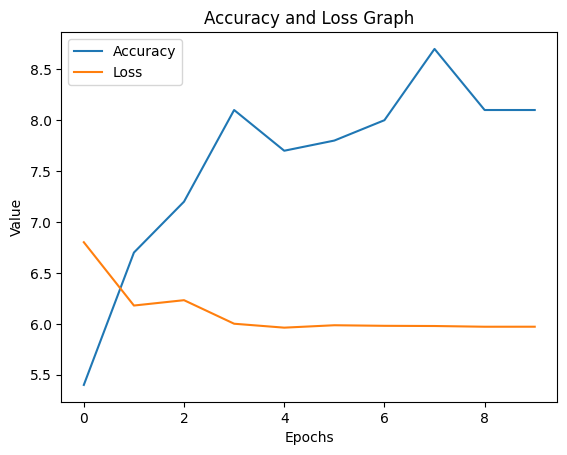

In [35]:
plt.plot(res_accur, label='Accuracy')
plt.plot(res_loss, label='Loss')
plt.xlabel('Epochs')
plt.ylabel('Value')
plt.title('Accuracy and Loss Graph')
plt.legend()
plt.show()